In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go

In [97]:
### Pulling Microsoft Stock

In [169]:
meta = yf.Ticker("META")

In [170]:
hist = meta.history(start="2021-01-01", end="2023-04-11")

In [171]:
hist.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-04 00:00:00-05:00,274.779999,275.000000,265.200012,268.940002,15106100,0.0,0.0
2021-01-05 00:00:00-05:00,268.290009,272.399994,268.209991,270.970001,9871600,0.0,0.0
2021-01-06 00:00:00-05:00,262.000000,267.750000,260.010010,263.309998,24354100,0.0,0.0
2021-01-07 00:00:00-05:00,265.899994,271.609985,264.779999,268.739990,15789800,0.0,0.0
2021-01-08 00:00:00-05:00,268.309998,268.950012,263.179993,267.570007,18528300,0.0,0.0


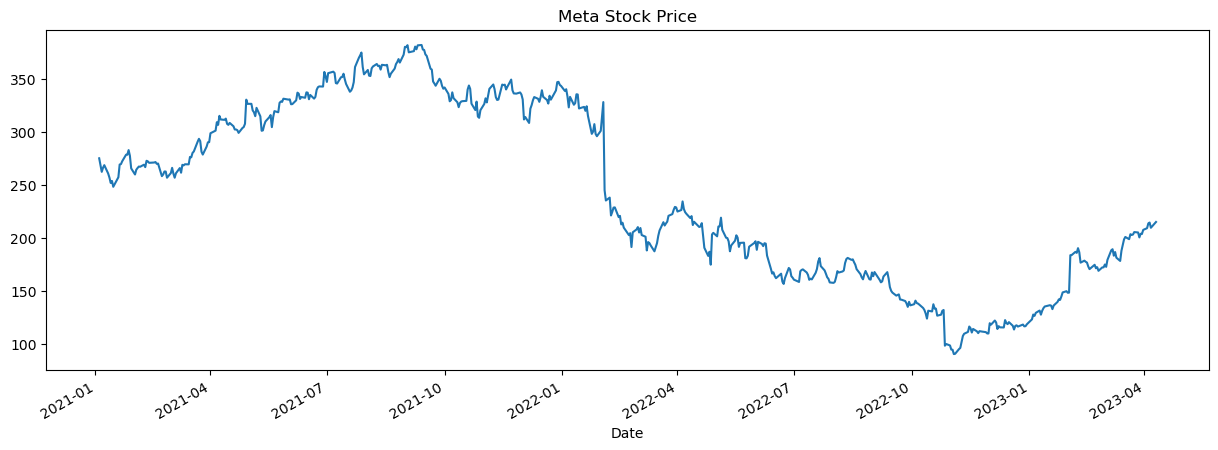

In [173]:
hist["Open"].plot(figsize=(15, 5), title="Meta Stock Price")

plt.show()

In [174]:
### Pull A bunch of stocks

stocks = [
    "AAPL",
    "TSLA",
    "005930.KS",
    "AMZN",
    "META"
]

In [175]:
hists = {}
for s in stocks:
    tkr = yf.Ticker(s)
    history = tkr.history(start="2021-01-01", end="2023-04-11")
    hists[s] = history

In [176]:
###Plot the Stock Price

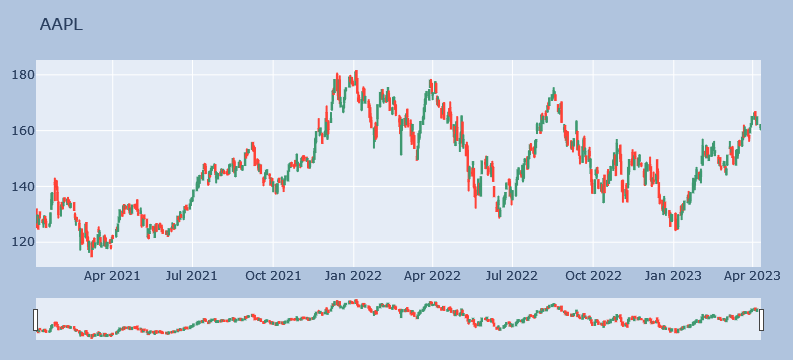

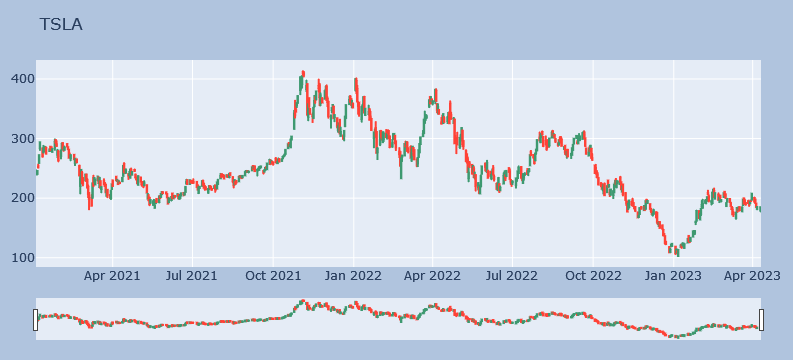

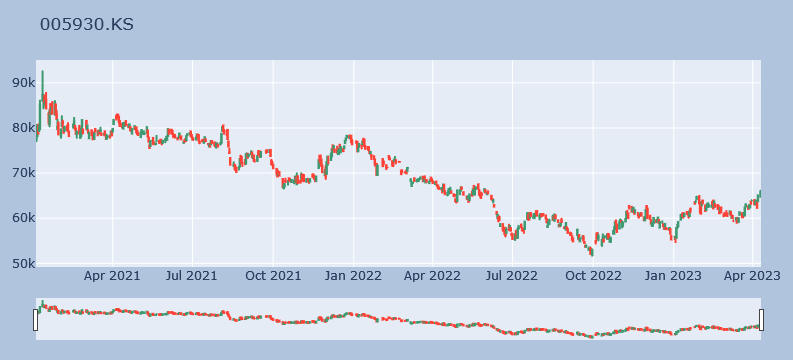

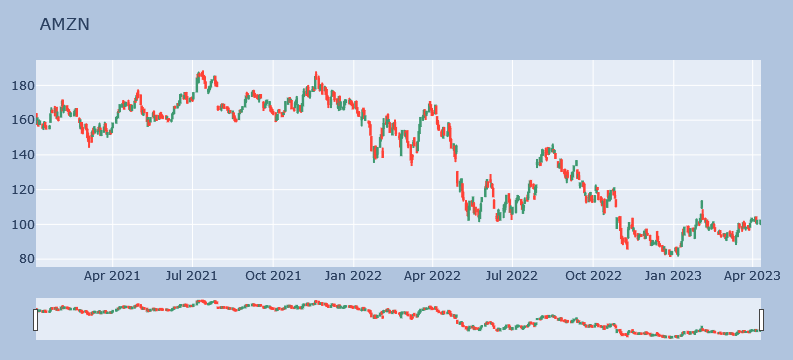

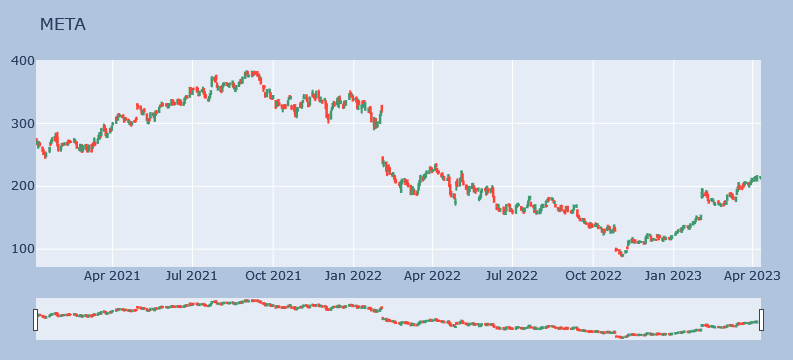

In [177]:
for stock in stocks:
    stock_df = hists[stock].copy()

    fig = go.Figure(
        data=[
            go.Candlestick(
                x=stock_df.index,
                open=stock_df["Open"],
                high=stock_df["High"],
                low=stock_df["Low"],
                close=stock_df["Close"],
            )
        ]
    )

    fig.update_layout(
        margin=dict(l=20, r=20, t=60, b=20),
        height=300,
        paper_bgcolor="LightSteelBlue",
        title=stock,
    )

    fig.show()

In [149]:
### Pull Tweets about each Stock

In [178]:
hists["META"].index.min()

Timestamp('2021-01-04 00:00:00-0500', tz='America/New_York')

In [179]:
stock = "META"

In [152]:
# importing libraries and packages
import snscrape.modules.twitter as sntwitter
import pandas
from tqdm.notebook import tqdm

In [180]:
# Creating list to append tweet data
tweets_list = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i, tweet in tqdm(
    enumerate(
        sntwitter.TwitterSearchScraper(
            f"${stock} since:2021-01-01 until:2023-04-12"
        ).get_items()
    ),
    total=12_000,
):  # declare a username
    if i > 12_000:  # number of tweets you want to scrape
        break
    tweets_list.append(
        [tweet.date, tweet.id, tweet.rawContent, tweet.user.username]
    )  # declare the attributes to be returned
# Creating a dataframe from the tweets list above
tweet_df = pd.DataFrame(
    tweets_list, columns=["Datetime", "Tweet Id", "Text", "Username"]
)

  0%|          | 0/12000 [00:00<?, ?it/s]

In [182]:
tweet_df.to_parquet("meta_tweets.parquet")

In [210]:
tweet_df

,Datetime,Tweet Id,Text,Username
0,2023-04-11 23:57:48+00:00,1645939235009220608,$BABA flagging/consolidating here after the up...,optionsful
1,2023-04-11 23:55:59+00:00,1645938779864150016,New ETF listed today Apr 11\n\nRoundhill BIG T...,ETFhearsay
2,2023-04-11 23:48:32+00:00,1645936905542926336,Hoy actualizamos el CASO DE ESTUDIO DE $META e...,ARENAALFA
3,2023-04-11 23:46:32+00:00,1645936401345544193,Stocks w/ most active options trading: \n\n...,Barchart
4,2023-04-11 23:45:18+00:00,1645936091164463106,'They paid us to just sit there': Former Meta ...,SCRIBEMOON
...,...,...,...,...
11996,2023-03-21 21:10:37+00:00,1638287018609500162,$GOOG $GOOGL $META $PYPL $SE $SMR $TSM $COIN -...,beeken_tech
11997,2023-03-21 21:08:29+00:00,1638286480648069122,Daily market review is in this approximate ord...,thetradingagent
11998,2023-03-21 21:03:34+00:00,1638285241654861826,$GOOG $GOOGL $META $PYPL $SE $SMR $TSM $COIN -...,beeken_tech
11999,2023-03-21 21:00:14+00:00,1638284402328322049,Bullish on $DWAC $SPY $COIN $TSLA $META $UPST ...,trade_tipper


In [211]:
### Sentiment Analysis Prep

In [212]:
from transformers import pipeline

model = f"cardiffnlp/twitter-roberta-base-sentiment-latest"

sentiment_task = pipeline("sentiment-analysis", model=model)
sentiment_task("Covid cases are increasing fast!")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'label': 'negative', 'score': 0.7235762476921082}]

In [213]:
sent_results = {}
count = 0
for i, d in tqdm(tweet_df.iterrows(), total=len(tweet_df)):
    sent = sentiment_task(d["Text"])
    sent_results[d["Tweet Id"]] = sent
    count += 1
    if count == 12_000:
        break

  0%|          | 0/12001 [00:00<?, ?it/s]

In [227]:
sent_df = pd.DataFrame(sent_results).T
sent_df["label"] = sent_df[0].apply(lambda x: x["label"])
sent_df["score"] = sent_df[0].apply(lambda x: x["score"])
sent_df = sent_df.merge(
    tweet_df.set_index("Tweet Id"), left_index=True, right_index=True
)

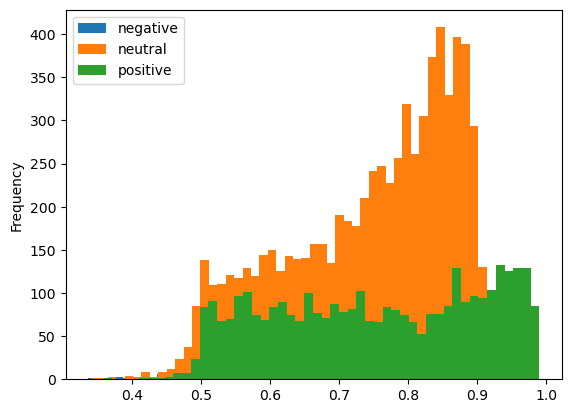

In [228]:
sent_df.groupby("label")["score"].plot(kind="hist", bins=50)
plt.legend()
plt.show()

In [231]:
# Set Neutral and Negative sccore on each '0' and '-'

sent_df["score_"] = sent_df["score"]

sent_df.loc[sent_df["label"] == "Negative", "score_"] = (
    sent_df.loc[sent_df["label"] == "Negative"]["score"] * -1
)

sent_df.loc[sent_df["label"] == "Neutral", "score_"] = 0

<AxesSubplot:ylabel='Frequency'>

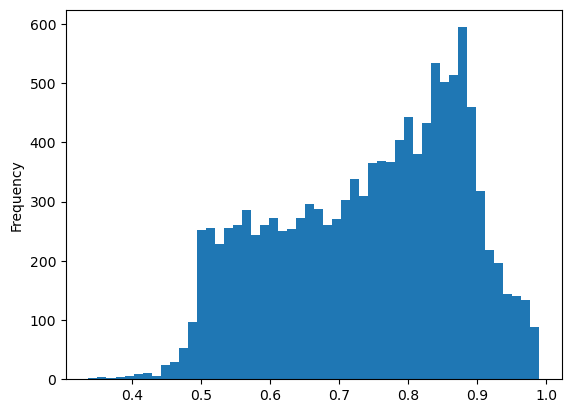

In [232]:
sent_df["score_"].plot(kind="hist", bins=50)

In [233]:
sent_df["Date"] = sent_df["Datetime"].dt.date

sent_daily = sent_df.groupby("Date")["score_"].mean()

meta_df = hists["META"].copy()
meta_df = meta_df.reset_index()
meta_df["Date"] = meta_df["Date"].dt.date
meta_df = meta_df.set_index("Date")

sent_and_stock = sent_daily.to_frame("sentiment").merge(
    meta_df, left_index=True, right_index=True)

In [234]:
sent_and_stock

,sentiment,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2023-03-21,0.761161,203.199997,203.550003,197.949997,202.160004,31827000,0.0,0.0
2023-03-22,0.757473,202.500000,207.369995,199.669998,199.809998,28477800,0.0,0.0
2023-03-23,0.746551,202.839996,207.880005,202.149994,204.279999,27389700,0.0,0.0
2023-03-24,0.734366,205.179993,207.580002,203.550003,206.009995,27733000,0.0,0.0
2023-03-27,0.736943,204.809998,205.860001,201.360001,202.839996,18527200,0.0,0.0
2023-03-28,0.737197,200.149994,201.029999,197.899994,200.679993,19127300,0.0,0.0
2023-03-29,0.748150,203.559998,205.720001,202.539993,205.350006,18851100,0.0,0.0
2023-03-30,0.749814,203.380005,208.089996,202.820007,207.839996,22608300,0.0,0.0
2023-03-31,0.747451,207.240005,212.169998,206.770004,211.940002,25412000,0.0,0.0


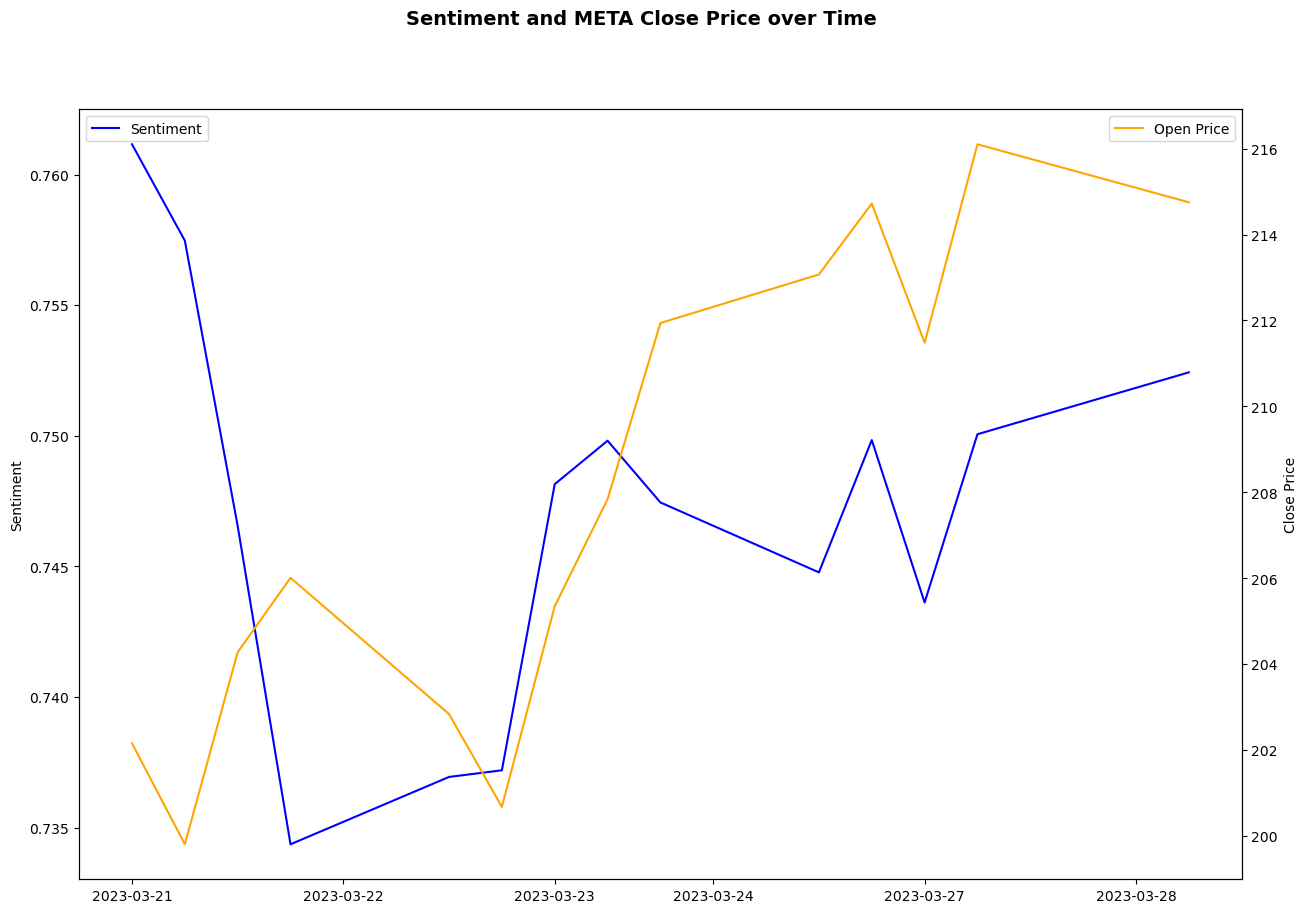

In [251]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(sent_and_stock.index, sent_and_stock["sentiment"], color="blue", label="Sentiment")

ax.set_ylabel("Sentiment")

ax.legend(loc="upper left")

ax2 = ax.twinx()
ax2.plot(sent_and_stock.index, sent_and_stock["Close"], color="orange", label="Open Price")

ax2.set_ylabel("Close Price")
ax2.legend(loc="upper right")

ax.xaxis.set_major_locator(plt.FixedLocator(ax.get_xticks()))
ax.xaxis.set_major_formatter(plt.FixedFormatter(sent_and_stock.index[::len(sent_and_stock.index)//10]))

fig.suptitle("Sentiment and META Close Price over Time", fontsize=14, fontweight="bold")

plt.show()